In [0]:
# clone UNET implementation form zhixuhao
!git clone https://github.com/zhixuhao/unet.git
!cp unet/model.py unet.py

# must use numpy==1.16.1, 1.16.3 has allow pickle false by default
!pip install numpy==1.16.1


fatal: destination path 'unet' already exists and is not an empty directory.


In [0]:
import tensorflow as tf
# tf.enable_eager_execution()

from keras import *
from unet import unet

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import scipy
import random


Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
data_x = np.load('/content/gdrive/My Drive/1 to 8 2000/x_dataset.pkl')
data_y = np.load('/content/gdrive/My Drive/1 to 8 2000/y_dataset.pkl')

data_x = np.array(data_x)
data_y = np.array(data_y)

print(data_y[88][2])
print(np.shape(data_y))

import os
# directory_x = "/content/gdrive/My Drive/project_set/1 to 12 dataset 20000/x_data/"
# directory_y = "/content/gdrive/My Drive/project_set/1 to 12 dataset 20000/y_data/"

directory_x = "/1 to 12 dataset 20000/x_data/"
directory_y = "/1 to 12 dataset 20000/y_data/"

if not os.path.exists(directory_x):
    os.makedirs(directory_x)
    
if not os.path.exists(directory_y):
    os.makedirs(directory_y)

shape_x = shape_y = 64

    

img_dataset_x = []
for n, state in enumerate(tqdm(data_x)):
    image = np.random.normal(0, 0.05, (shape_x,shape_y))
    for point in state:
        x,y = point.astype(int)
        image[x][y] = 1
    img_dataset_x.append(image)
        
img_dataset_y = []
for n, state in enumerate(tqdm(data_y)):
    image = np.random.normal(0, 0.05, (shape_x,shape_y))
    for point in state:
        x,y = point.astype(int)
        image[x][y] = 1
    img_dataset_y.append(image)


# img_dataset_x = []
# for n, state in enumerate(tqdm(data_x)):
#     image = np.zeros((58,58))
#     for point in state:
#         x,y = point.astype(int)
#         image[x][y] = 1
#     np.save(directory_x+str(n)+'.np', image)
        
# img_dataset_y = []
# for n, state in enumerate(tqdm(data_y)):
#     image = np.zeros((58,58))
#     for point in state:
#         x,y = point.astype(int)
#         image[x][y] = 1
#     np.save(directory_y+str(n)+'.np', image



x_train = np.array(img_dataset_x)
y_train = np.array(img_dataset_y)

x_train = x_train.reshape(-1,shape_x,shape_y,1)
y_train = y_train.reshape(-1,shape_x,shape_y,1)

[15.2 15. ]
(16000,)


In [0]:
class GAN():
    def __init__(self):
        self.img_rows = shape_x
        self.img_cols = shape_y
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)

        optimizer = optimizers.Adam()
        loss = losses.binary_crossentropy
        
        #import UNET
        self.generator = unet(False,self.img_shape)
        self.generator.compile(loss=loss, optimizer=optimizers.Adam(lr=0.1))


    def train(self, epochs, batch_size=128, sample_interval=50, sample_size = 5):
        
        with tqdm(range(epochs)) as pbar:
            for epoch in pbar:
                
                filepath="Just-UNET-weights-"+str(epoch)+"{epoch:02d}-{loss:.2f}.hdf5"
                checkpoint = callbacks.ModelCheckpoint(filepath, monitor='loss', verbose=1)
                callbacks_list = [checkpoint]
                
                history = self.generator.fit(x_train, y_train, batch_size=batch_size, epochs = sample_interval, callbacks=callbacks_list)

                # If at save interval => save generated image samples
                if epoch % sample_interval == 0:
                    # Select a random batch of images
                    idx = np.random.randint(0, x_train.shape[0], sample_size)
                    imgs_x = x_train[idx]
                    imgs_y = y_train[idx]
                    self.sample_images(epoch, imgs_x, imgs_y)

    def sample_images(self, epoch, imgs_x, imgs_y):
        r, c = 2, 2
        gen_imgs = self.generator.predict(imgs_x)
        
        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(imgs_x[cnt, :,:,0])
                axs[i,j].axis('off')
                cnt += 1
        plt.show()
        plt.close()

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0])
                axs[i,j].axis('off')
                cnt += 1
        plt.show()
        plt.close()
        
        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(imgs_y[cnt, :,:,0])
                axs[i,j].axis('off')
                cnt += 1
        plt.show()
        plt.close()
     

In [0]:
CE = GAN()

/content/unet.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


Epoch 1/10
16000/16000 [==============================] - 60s 4ms/step - loss: 15.2938

Epoch 00001: saving model to Just-UNET-weights-001-15.29.hdf5
Epoch 2/10
16000/16000 [==============================] - 57s 4ms/step - loss: 15.7851

Epoch 00002: saving model to Just-UNET-weights-002-15.79.hdf5
Epoch 3/10
16000/16000 [==============================] - 57s 4ms/step - loss: 15.7851

Epoch 00003: saving model to Just-UNET-weights-003-15.79.hdf5
Epoch 4/10
16000/16000 [==============================] - 57s 4ms/step - loss: 15.7851

Epoch 00004: saving model to Just-UNET-weights-004-15.79.hdf5
Epoch 5/10
16000/16000 [==============================] - 57s 4ms/step - loss: 15.7851

Epoch 00005: saving model to Just-UNET-weights-005-15.79.hdf5
Epoch 6/10
16000/16000 [==============================] - 57s 4ms/step - loss: 15.7851

Epoch 00006: saving model to Just-UNET-weights-006-15.79.hdf5
Epoch 7/10
16000/16000 [==============================] - 58s 4ms/step - loss: 15.7851

Epoch 00007:

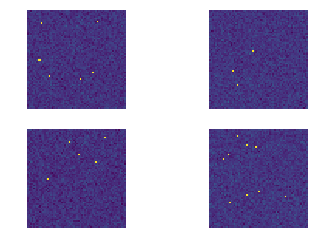

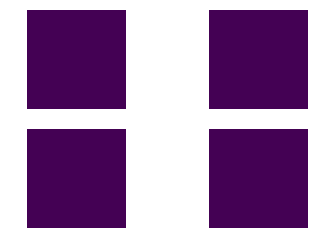

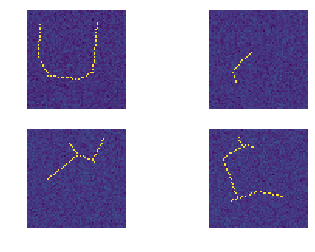

Epoch 1/10
 4352/16000 [=======>......................] - ETA: 41s - loss: 15.7849


KeyboardInterrupt: ignored

In [0]:
CE.train(epochs=300, batch_size=256, sample_interval=10)